# **About Dataset**

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Numbe of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user

# **Import Library**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings

warnings.filterwarnings('ignore')

# **Load Dataset**

In [52]:
df = pd.read_csv('dataset/CC_GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [55]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# **EDA**

1. Correlation Matrix

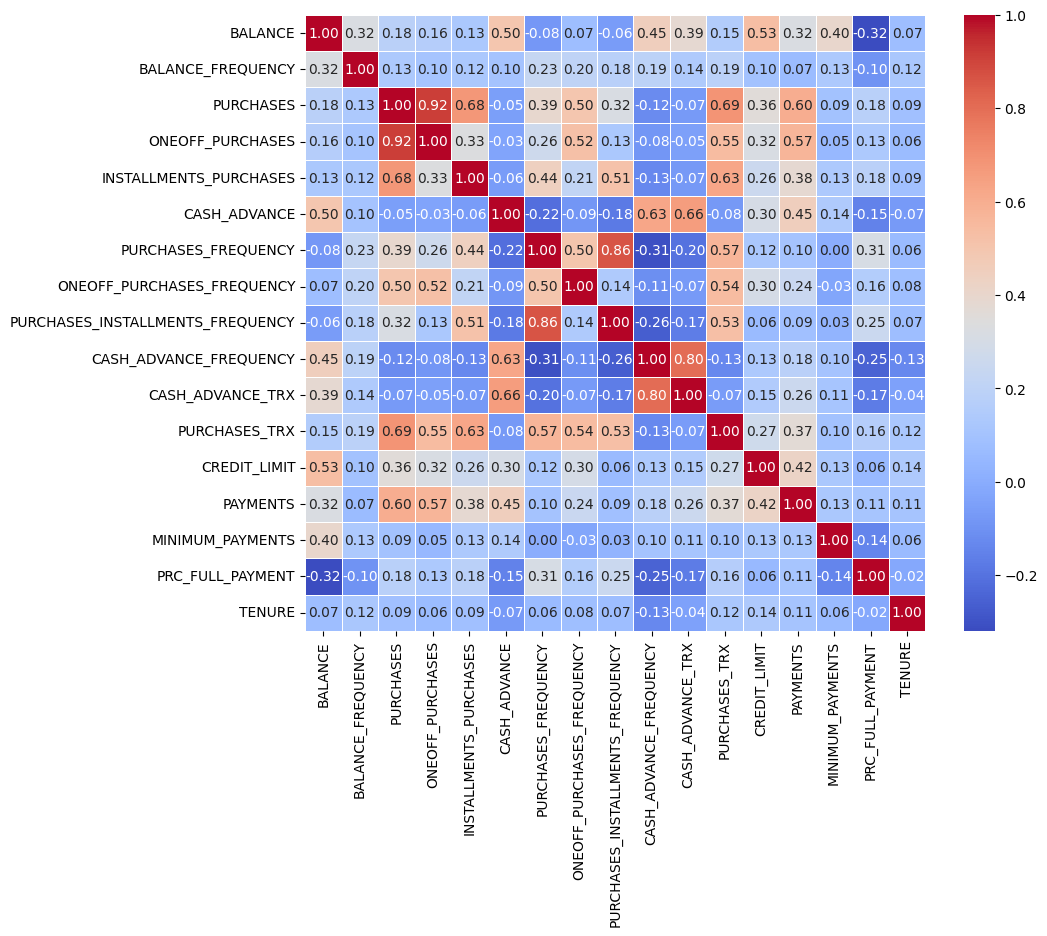

In [56]:
cc_df = df.select_dtypes(exclude='object')

plt.figure(figsize=(10, 8))
sns.heatmap(cc_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

2. Balance Analysis

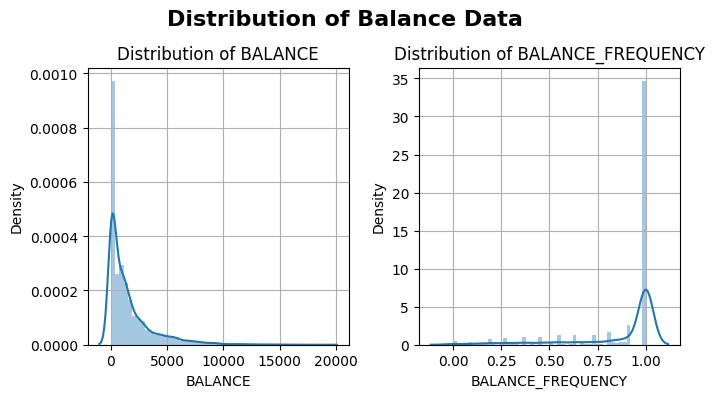

In [57]:
balance_data = df.filter(like='BALANCE')

plt.figure(figsize=(7, 7))
plt.suptitle('Distribution of Balance Data', fontweight='bold', fontsize=16)
for i,col in enumerate(balance_data.columns,1):
    plt.subplot(2,2,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(balance_data[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

3. Purchase Analysis

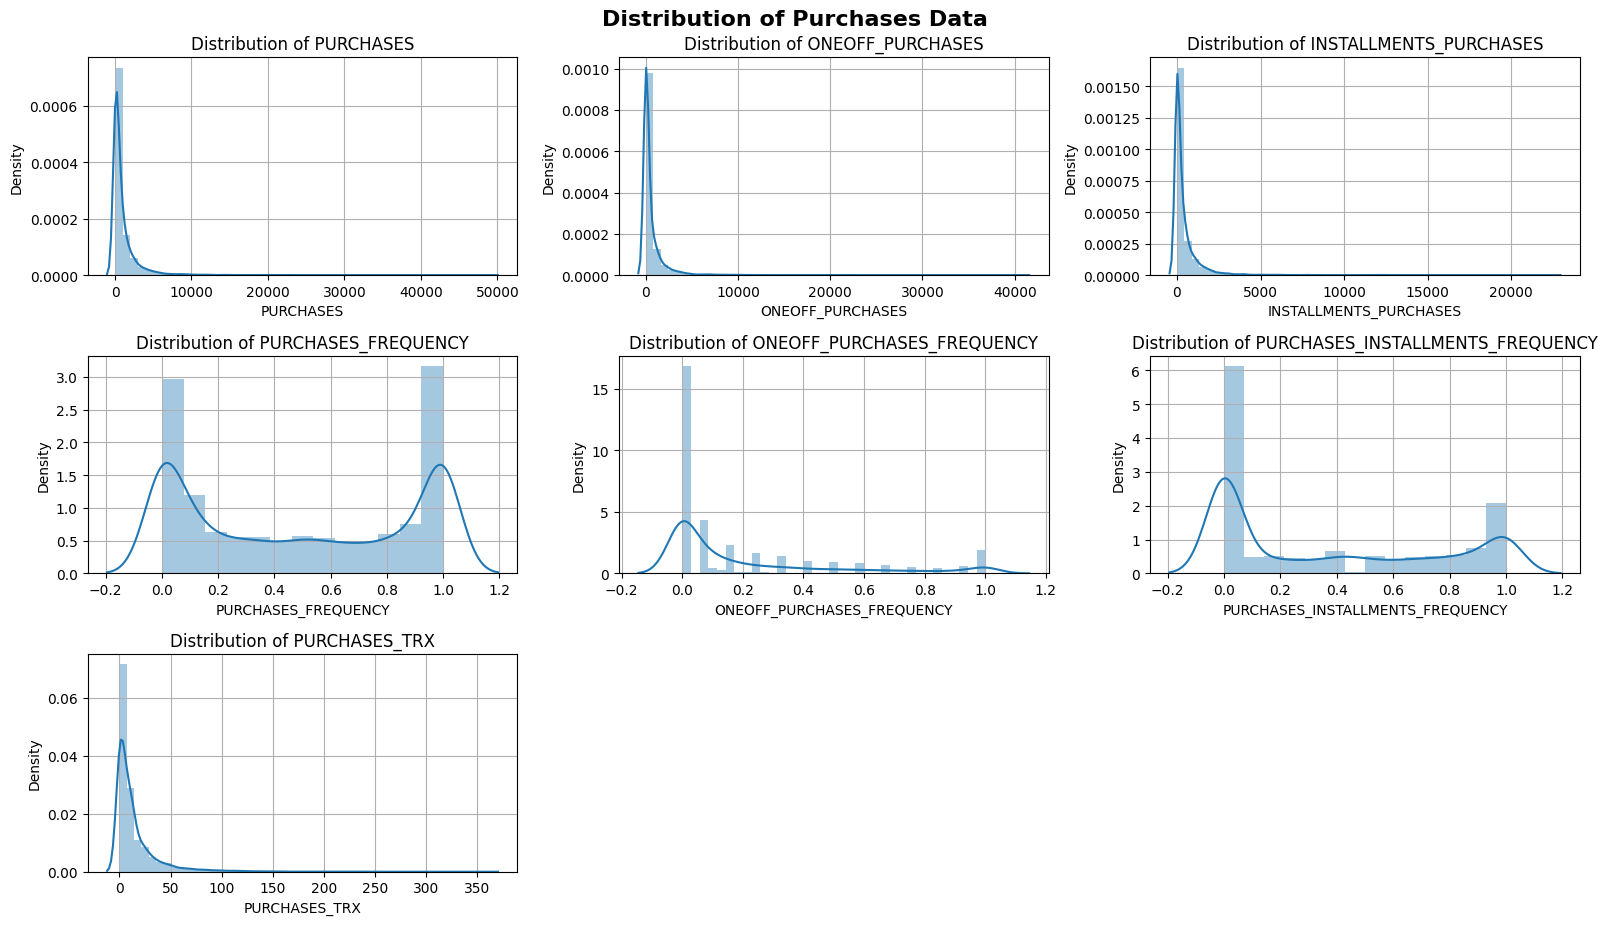

In [58]:
purchases_data = df.filter(like='PURCHASES')

plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Purchases Data', fontweight='bold', fontsize=16)
for i,col in enumerate(purchases_data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(purchases_data[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

3. Cash Analysis

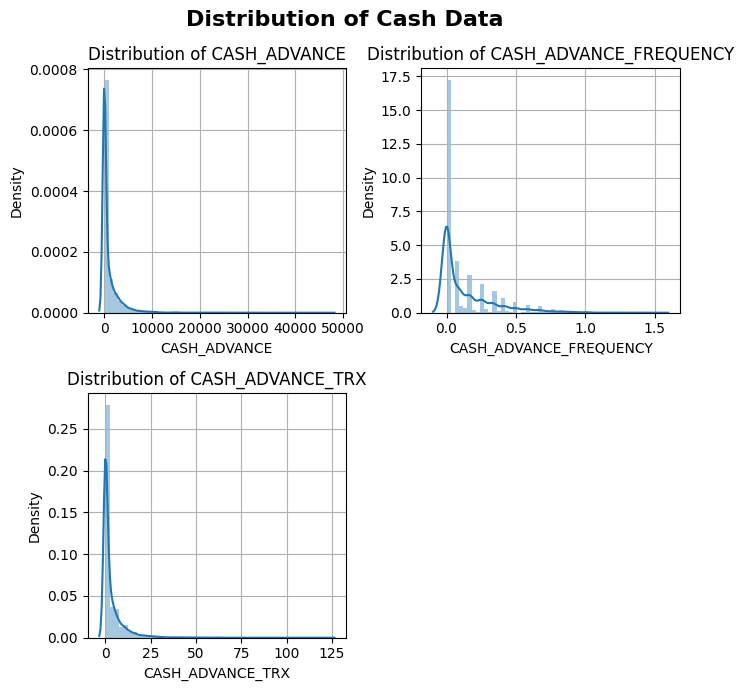

In [59]:
cash_data = df.filter(like='CASH')

plt.figure(figsize=(7, 7))
plt.suptitle('Distribution of Cash Data', fontweight='bold', fontsize=16)
for i,col in enumerate(cash_data.columns,1):
    plt.subplot(2,2,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(cash_data[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

4. Payment Analysis

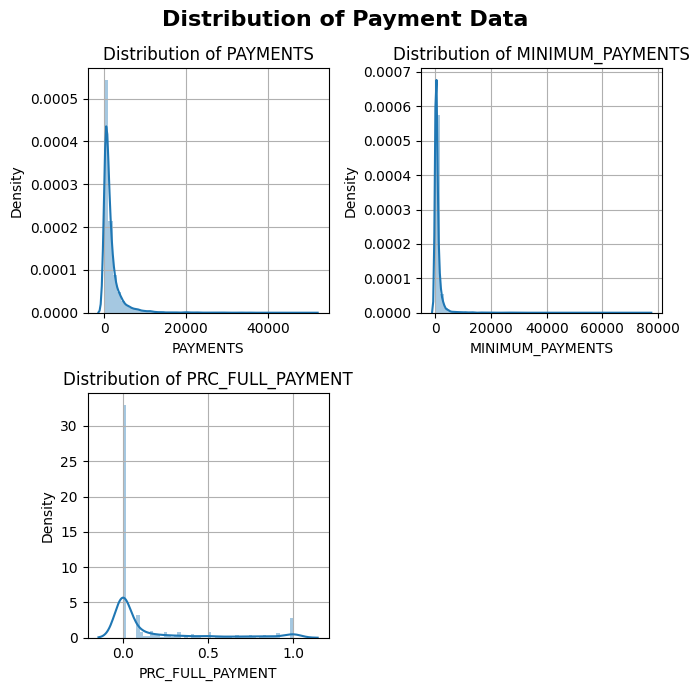

In [60]:
payment_data = df.filter(like='PAYMENT')

plt.figure(figsize=(7, 7))
plt.suptitle('Distribution of Payment Data', fontweight='bold', fontsize=16)
for i,col in enumerate(payment_data.columns,1):
    plt.subplot(2,2,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(payment_data[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

# **Data Prepocessing**

1. Dealing with Missing Value

Since there is only 1 missing value in the CREDIT_LIMIT column, I will drop that missing value.

In [61]:
cc_df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

For the missing values in the MINIMUM_VALUE column, I will fill them using the median

In [62]:
cc_df['MINIMUM_PAYMENTS'].fillna(cc_df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [63]:
cc_df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

2. Data Standardization

In [66]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cc_df)

# **Modeling**

1. Model Training

In [72]:
model = KMeans(n_clusters=2, init='k-means++')

model.fit(data_scaled)

KMeans(n_clusters=2)

In [73]:
model.inertia_

127772.56384284835

2. Model Evaluation

Determine the optimal number of clusters using elbow method

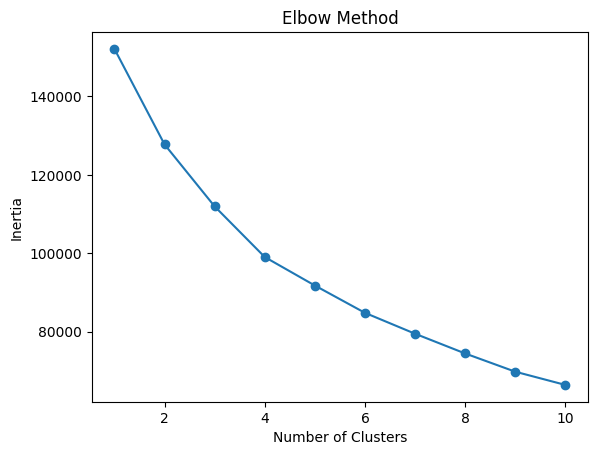

In [81]:
# fitting the multiple k-means algorithms and storing the values in an empty list
SSE = []

for cluster in range (1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the result into a dataframe and plotting them
plt.plot(range(1, 11), SSE, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

looking at the elbow curve above, we can choose number of cluster is 4

In [94]:
kmeans = KMeans(n_clusters=4, init='k-means++')

kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [96]:
pred = kmeans.predict(data_scaled)

Finally, let's examine the total point values in each of the clusters formed above.

In [97]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
1    3977
2    3366
3    1197
0     409
Name: count, dtype: int64